<a href="https://colab.research.google.com/github/rehman2222/AI/blob/main/KNN_ModelTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_iris()               # Load the Iris dataset
X = data.data                    # Features (inputs)
y = data.target                  # Labels (outputs)

# Step 2: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=43
)

# Step 3: Create KNN model with k=3
model = KNeighborsClassifier(n_neighbors=100)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict on both training and test data
y_train_pred = model.predict(X_train)   # Predictions for training data
y_test_pred = model.predict(X_test)     # Predictions for test data

# Step 6: Evaluate accuracy for both
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 7: Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.6857142857142857
Testing Accuracy: 0.6222222222222222


Available columns: ['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']
                 unix          open          high           low         close  \
Cluster                                                                         
0        1.507211e+09   5408.176757   5412.268157   5403.039360   5407.962519   
1        1.492926e+09   1701.585746   1702.668975   1700.414618   1701.596923   
2        1.513397e+09  14774.255710  14796.269910  14746.601748  14774.123588   

         Volume BTC     Volume USD  
Cluster                             
0         11.446706   56933.320310  
1          7.145100   13026.211898  
2         12.922952  188602.674056  


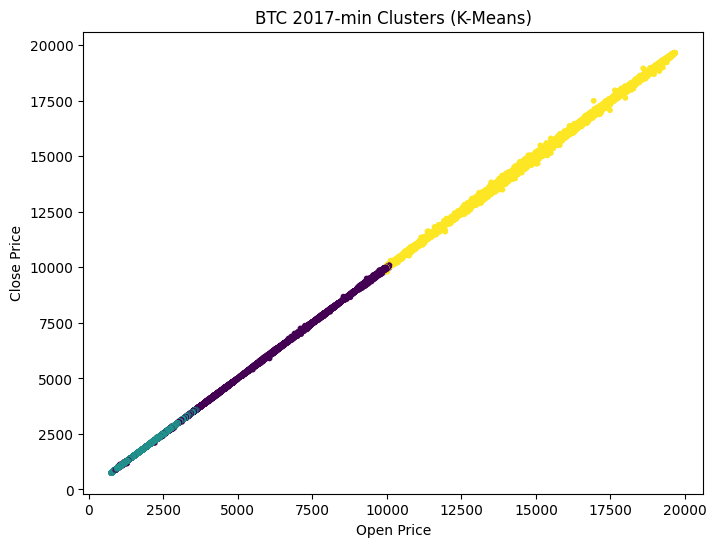

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/AI Assignment/BTC-2017min.csv.zip")

# Display columns to help user identify the correct column names
print("Available columns:", data.columns.tolist())

# Select numeric features
X = data[["open", "high", "low", "close", "Volume BTC"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means model (unsupervised)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels
data["Cluster"] = kmeans.labels_

# Show cluster means, excluding non-numeric columns
print(data.groupby("Cluster").mean(numeric_only=True))

# Plot clusters (Open vs Close)
plt.figure(figsize=(8,6))
plt.scatter(data["open"], data["close"], c=data["Cluster"], cmap="viridis", s=10)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("BTC 2017-min Clusters (K-Means)")
plt.show()